## Predição de Faixa de Valores de Smartphones Utilizando o Algoritmo de Aprendizado de Máquina Naive Bayes

Os dados foram obtidos no seguinte link: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

Nesta base temos algumas colunas como: 

     - battery_power: potência da bateria;
     - dual_sim: se suporta dois chips; 
     - four_g: se possui 4G;
     - int_memory: memória interna; 
     - ram: memória ram do aparelho;
     - three_g: se tem 3G;
     - touch_screen: se é touch screen;
     - wifi: se possui wifi;
     - price_range: faixa de preço do celular.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
df = pd.read_csv('data_smartphones.csv')

## Análise Exploratória

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

Nota-se que o dataset possui 2000 linhas e 21 colunas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### O quão avançada era a tecnologia dos smartphones em 2017?

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [85]:
df.pc.mean()

9.9165

Com a descrição dos dados acima, podemos inferir que um smartphone médio da época teria as seguintes especificações:

- __CPU__:  Quad-core @ 1.5GHz 
- __RAM__: 2.1GB
- __Armazenamento__: 32GB
- __Bateria__: 1240mAh
- __Tela__: 1250x645 pixels (~ HD)
- __Câmera principal__: 10Mp

In [7]:
df.median()

battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                5.0
talk_time          11.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         1.5
dtype: float64

In [3]:
categorical = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[categorical].mode()

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,1,1,1,1,1


### Quais características mais parecem influenciar a faixa de preço dos smartphones?

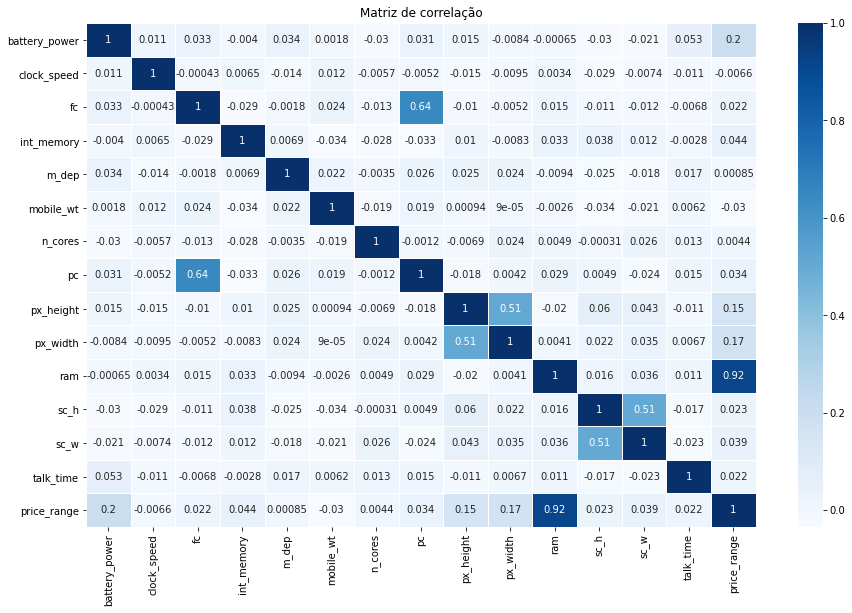

In [4]:
numericals = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
              'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']
df_corr = df[numericals].corr()
plt.figure(figsize=(15, 15/1.6180339))
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap='Blues')
plt.title('Matriz de correlação');

Pela matriz de corelação acima, pode-se observar que a quantidade de memória RAM possui uma correlação quase perfeita (0.92) com a faixa de preço, indicando que quanto maior a quantidade de memória RAM, maior tende a ser a faixa de preço do aparelho.

Além da RAM, a capacidade da bateria tem uma ligeira correlação (0.2), e a resolução da tela com as colunas de largura e altura (0.17 e 0.15, respectivamente).

### Relação RAM vs. faixa de preço

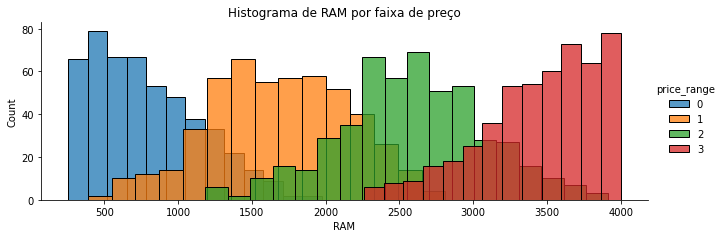

In [83]:
g = sns.FacetGrid(df, hue='price_range', height=3, aspect=3)
g.map_dataframe(sns.histplot, x="ram")
g.add_legend()
plt.title('Histograma de RAM por faixa de preço')
plt.xlabel('RAM')
plt.ylabel('Count');

No gráfico notamos que quanto maior a memória ram, maior tende a ser o preço do celular.

### Popularidade 3G vs. 4G

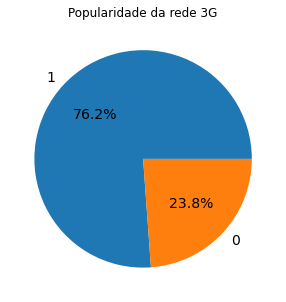

In [31]:
plt.figure(figsize=(5,5))
df.three_g.value_counts(normalize=True).plot.pie(autopct="%.1f%%", textprops={'fontsize': 14})
plt.title('Popularidade da rede 3G')
plt.ylabel('');

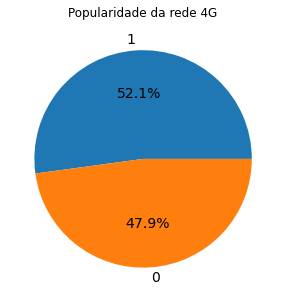

In [32]:
plt.figure(figsize=(5,5))
df.four_g.value_counts(normalize=True).plot.pie(autopct="%.1f%%", textprops={'fontsize': 14})
plt.title('Popularidade da rede 4G')
plt.ylabel('');

### Balanceamento

In [6]:
df.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

Nota-se que os dados estão perfeitamente distribuídos entre as classes, o que deve facilitar o trabalho do classificador.

### Boxplots

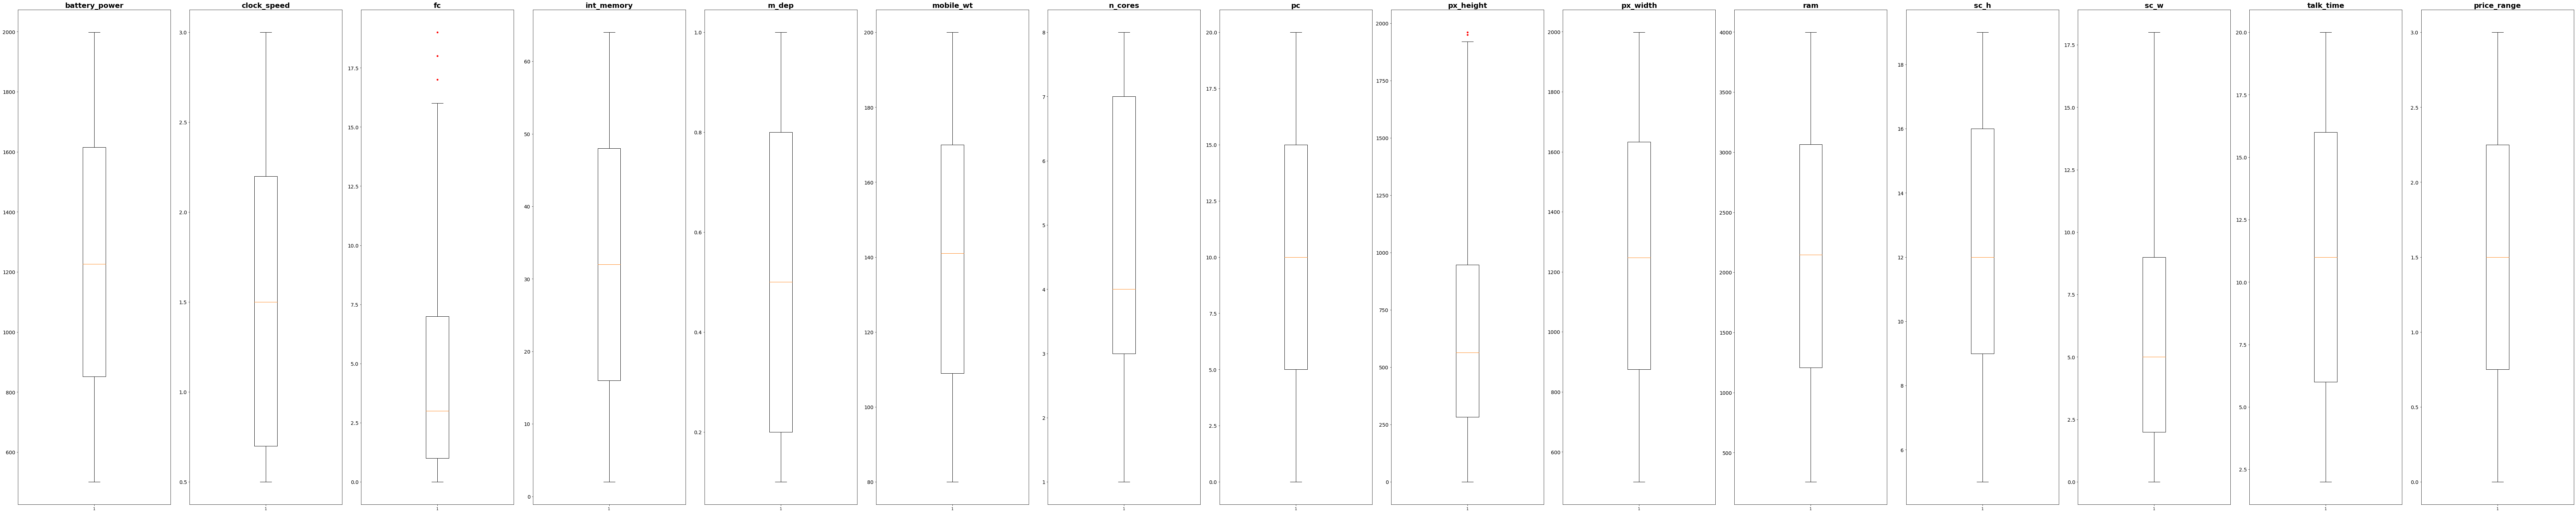

In [11]:
#Creating subplot of each column with its own scale

df_numericals = df[numericals]
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df_numericals.columns), figsize=(100,20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_numericals.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_numericals.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

**Abrir imagem acima em nova aba**

Nota-se que as colunas `fc` e `px_height` possuem outliers, que necessitam serem removidos, pois outliers afetam a média e distribuição das __features__, o que pode prejudicar o funcionamento do Naive Bayes, que funciona melhor com distribuições normais.

Conforme observado na matriz de correlação, as colunas `(fc, pc)`, `(sc_h, sc_w)`, `(px_h, px_w)` são consideravelmente correlacionadas (corr > 0.5), será necessário remover 1 de cada par, já que uma das assertivas do Naive Bayes é que as colunas são independentes.

## Pré-processamento

### Removendo outliers 

In [7]:
def get_max_fence(column):
    """Calculates outlier max limit using interquartile range.
       If a given value is greater than max_fence then it's an outlier.
       
    Parameters
    ---------- 
    column : pd.Series
        data to calculate the max limit
        
    Returns
    -------
    float
        calculated outlier limit
    """
    
    quartiles = column.quantile([0.25,0.75])
    first_quartile, third_quartile = quartiles.values[0], quartiles.values[1]
    interquartile_range = third_quartile - first_quartile
    max_fence = third_quartile + 1.5 * interquartile_range
    
    return max_fence

fc_fence = get_max_fence(df['fc'])
px_height_fence = get_max_fence(df['px_height'])

print(f'Fc max fence: {fc_fence}, Px max fence: {px_height_fence}')

Fc max fence: 16.0, Px max fence: 1944.0


Para nosso propósito, serão considerados outliers smartphones com resolução >= 16Mp na câmera frontal ou com altura de pixels >= 1944.

In [14]:
clean_df = df.drop(df[(df.fc >= fc_fence) | (df.px_height >= px_height_fence)].index)
clean_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Com o processo de remoção de outliers foram removidos 44 linhas, ficando o dataset com 1956 linhas.

### Removendo colunas altamente correlacionadas 

In [15]:
model_df = clean_df.drop(columns=['fc', 'px_width', 'sc_h'])
model_df

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,0,7,0.6,188,2,2,20,2549,7,19,0,0,1,1
1,1021,1,0.5,1,1,53,0.7,136,3,6,905,2631,3,7,1,1,0,2
2,563,1,0.5,1,1,41,0.9,145,5,6,1263,2603,2,9,1,1,0,2
3,615,1,2.5,0,0,10,0.8,131,6,9,1216,2769,8,11,1,0,0,2
4,1821,1,1.2,0,1,44,0.6,141,2,14,1208,1411,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,1,2,0.8,106,6,14,1222,668,4,19,1,1,0,0
1996,1965,1,2.6,1,0,39,0.2,187,4,3,915,2032,10,16,1,1,1,2
1997,1911,0,0.9,1,1,36,0.7,108,8,3,868,3057,1,5,1,1,0,3
1998,1512,0,0.9,0,1,46,0.1,145,5,5,336,869,10,19,1,1,1,0


Então o dataset fica com 18 colunas das 21 iniciais.

## Modelagem

In [20]:
#separando features e target
X = model_df.drop(columns=['price_range'])
y = model_df['price_range']

#dividindo 70% dos dados para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=33, shuffle=True)

#treinamento
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = np.sqrt(accuracy_score(y_test, y_pred))
print('Acurácia: %.3f' % (accuracy))

Acurácia: 0.885


### Avaliando o modelo utilizando cross-validation com KFold = 5

In [21]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(gnb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Acurácia: %.3f' % (np.mean(scores)))
print(scores)
print('Desv. Padrão dos scores: ', np.std(scores))

Acurácia: 0.788
[0.7627551  0.80051151 0.79028133 0.81841432 0.76982097]
Desv. Padrão dos scores:  0.02026780339266555


Observa-se que o modelo continua com uma boa performance, independente da parte do dataset, com uma acurácia mínima de 76.2% no primeiro fold, e máximo de 81.84% no quarto fold.

O desvio padrão foi mínimo, de apenas 0.02.

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       136
           1       0.70      0.68      0.69       154
           2       0.70      0.70      0.70       151
           3       0.90      0.88      0.89       146

    accuracy                           0.78       587
   macro avg       0.79      0.79      0.79       587
weighted avg       0.78      0.78      0.78       587



### Matriz de confusão

In [22]:
confusion_matrix(y_test, y_pred)

array([[122,  14,   0,   0],
       [ 22, 104,  28,   0],
       [  0,  30, 106,  15],
       [  0,   0,  18, 128]])

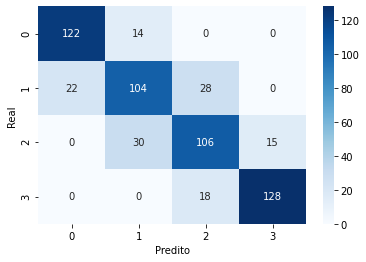

In [23]:
labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.ylabel('Real')
plt.xlabel('Predito');